#### kosis.kr: 소방청->시도별화재발생현황(총괄)2010~2021
* 시각화 기획,설계,구현
* 기획
    - 전국 기준으로 년도별 사망자와 부상자 증가 추이 -> 왼쪽에는 사망자 추이, 오른쪽에는 부상자 추이
    - 사망자와 부상자간의 상관관계 구하기
    - 부산에서 년도별 재산 피해 비율 (2010, 2021)
    - 지역별 화재건수 구하기 (2010, 2021)
    - 시별, 도별 사망자와 부상자간의 상관관계 구하기
    - 시별, 도별 년도별 이재민 수 포인트 그래프 만들기
* 참고: https://www.nfds.go.kr/

In [1]:
# 필요 라이브러리
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# 한글 글꼴 넣어주기
current_font_list = matplotlib.rcParams['font.family']
font_path = "C:\Windows\Fonts\gulim.ttc"
kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rcParams['font.family'] = [kfont] + current_font_list

In [3]:
# 데이터 불러오기
pd_data = pd.read_csv('시도별_화재발생_현황_총괄__20230307153251.csv', encoding = 'cp949')
pd_data

,행정구역별,시점,건수 (건),사망 (명),부상 (명),재산피해(계) (천원),부동산 (천원),동산 (천원),이재가구수 (가구),이재민수 (명)
0,전국,2010,41863,304,1588,266776332,117808118,148968214,1183,2623
1,전국,2011,43875,263,1599,256547614,113257928,143289686,1158,2417
2,전국,2012,43249,267,1955,289493719,127500018,161993701,1062,2254
3,전국,2013,40932,307,1877,434462330,178812680,255649650,1354,2330
4,전국,2014,42135,325,1856,405356513,168824616,236531897,1178,2374
...,...,...,...,...,...,...,...,...,...,...
209,제주특별자치도,2017,751,5,19,3944602,2022493,1922109,9,15
210,제주특별자치도,2018,636,4,23,3956895,1199603,2757292,5,8
211,제주특별자치도,2019,607,3,33,2998401,1088297,1910104,6,15
212,제주특별자치도,2020,515,12,14,4905209,1964304,2940905,8,15


In [4]:
pd_data['시점'] = pd_data['시점'].astype('category')
pd_data['행정구역별'] = pd_data['행정구역별'].astype('str')

In [5]:
pd_data['사망 (명)'] = pd_data['사망 (명)'].replace('-', '0')
pd_data['사망 (명)'].unique()
pd_data['사망 (명)'] = pd_data['사망 (명)'].astype(np.int64)

In [6]:
pd_data.dtypes

행정구역별             object
시점              category
건수 (건)             int64
사망 (명)             int64
부상 (명)             int64
재산피해(계) (천원)       int64
부동산 (천원)           int64
동산 (천원)            int64
이재가구수 (가구)         int64
이재민수 (명)           int64
dtype: object

In [7]:
pd_data['행정구역별'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

Text(0.5, 1.0, '전국 년도별 부상자')

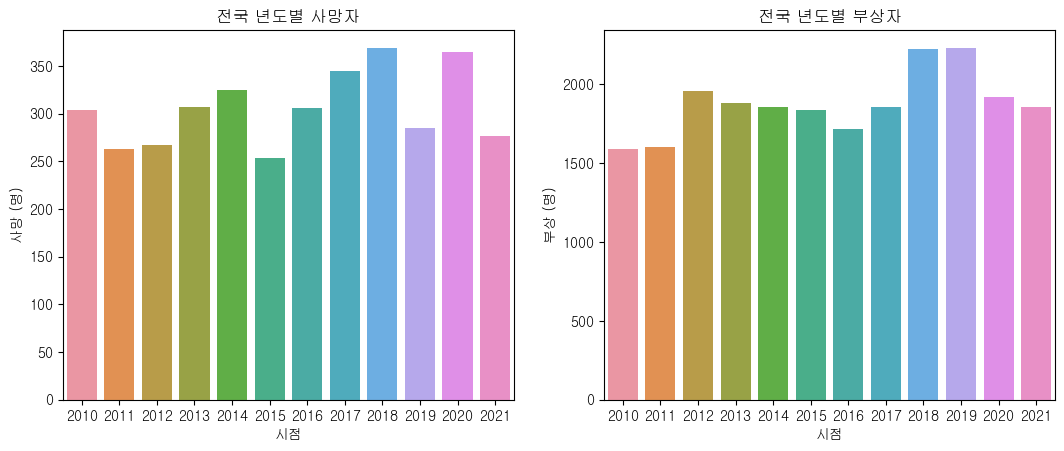

In [8]:
fig = plt.figure(figsize=(6.4*2, 4.8))
a = fig.add_subplot(1,2,1)
b = fig.add_subplot(1,2,2)
filter1 = pd_data['행정구역별'] == '전국'
sns.barplot(data=pd_data[filter1], x="시점", y='사망 (명)', ax=a)
a.set_title('전국 년도별 사망자')
sns.barplot(data=pd_data[filter1], x="시점", y='부상 (명)', ax=b)
b.set_title('전국 년도별 부상자')

In [9]:
filter1 = pd_data['행정구역별'] != '전국'
local_data = pd_data[filter1]
local_data = local_data.reset_index()
local_data = local_data.drop(labels='index',axis=1)
local_data['행정구역별'].value_counts()

서울특별시      12
강원도        12
경상남도       12
경상북도       12
전라남도       12
전라북도       12
충청남도       12
충청북도       12
경기도        12
부산광역시      12
울산광역시      12
대전광역시      12
광주광역시      12
인천광역시      12
대구광역시      12
제주특별자치도    12
세종특별자치시    10
Name: 행정구역별, dtype: int64

Text(0.5, 1.0, '행정 구역별 부상자와 사망자의 상관관계')

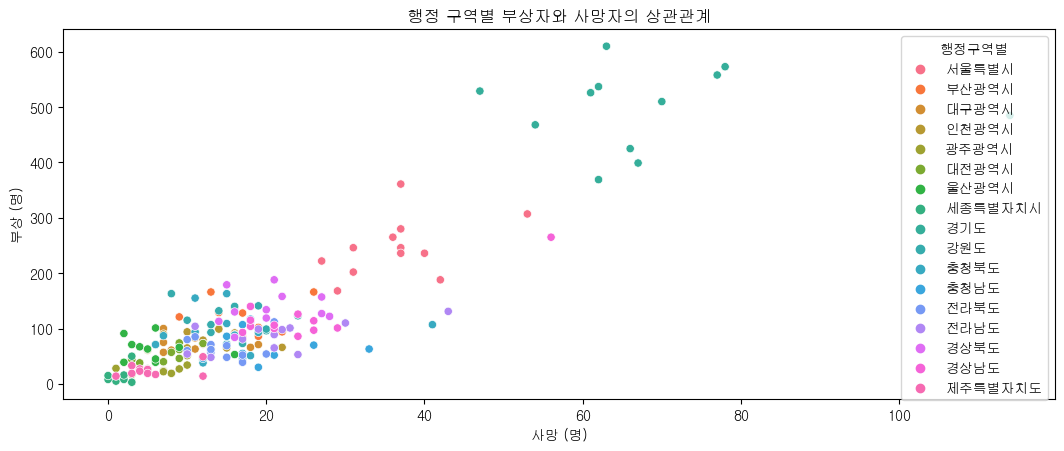

In [10]:
fig = plt.figure(figsize=(6.4*2, 4.8))
c = fig.add_subplot()
sns.scatterplot(data=local_data, x="사망 (명)", y='부상 (명)', hue = '행정구역별')
c.set_title('행정 구역별 부상자와 사망자의 상관관계')

In [11]:
local_data

,행정구역별,시점,건수 (건),사망 (명),부상 (명),재산피해(계) (천원),부동산 (천원),동산 (천원),이재가구수 (가구),이재민수 (명)
0,서울특별시,2010,5321,42,188,14503873,5948963,8554910,131,277
1,서울특별시,2011,5526,29,168,14185528,5887081,8298447,158,312
2,서울특별시,2012,5724,31,246,17382374,6132231,11250143,131,260
3,서울특별시,2013,5646,31,202,21495228,6814090,14681138,58,153
4,서울특별시,2014,5815,36,265,20052979,6674887,13378092,161,369
...,...,...,...,...,...,...,...,...,...,...
197,제주특별자치도,2017,751,5,19,3944602,2022493,1922109,9,15
198,제주특별자치도,2018,636,4,23,3956895,1199603,2757292,5,8
199,제주특별자치도,2019,607,3,33,2998401,1088297,1910104,6,15
200,제주특별자치도,2020,515,12,14,4905209,1964304,2940905,8,15


Text(0.5, 1.0, '2021년 부산 재산피해 비율')

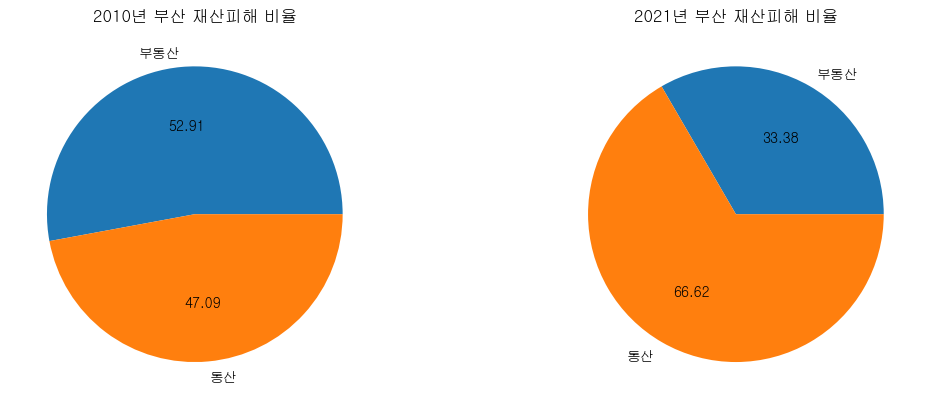

In [12]:
fig = plt.figure(figsize=(6.4*2, 4.8))
d = fig.add_subplot(1,2,1)
f = fig.add_subplot(1,2,2)

filter1 = (local_data['행정구역별'] == '부산광역시') & (local_data['시점'] == 2010)
# local_data[filter1]
filter2 = (local_data['행정구역별'] == '부산광역시') & (local_data['시점'] == 2021)
# local_data[filter2]

d.pie(local_data.iloc[12, 6:8], labels = ['부동산', '동산'], autopct= '%.2f')
d.set_title('2010년 부산 재산피해 비율')
f.pie(local_data.iloc[23, 6:8], labels = ['부동산', '동산'], autopct= '%.2f')
f.set_title('2021년 부산 재산피해 비율')

Text(0.5, 1.0, '2021 지역별 사고 건수')

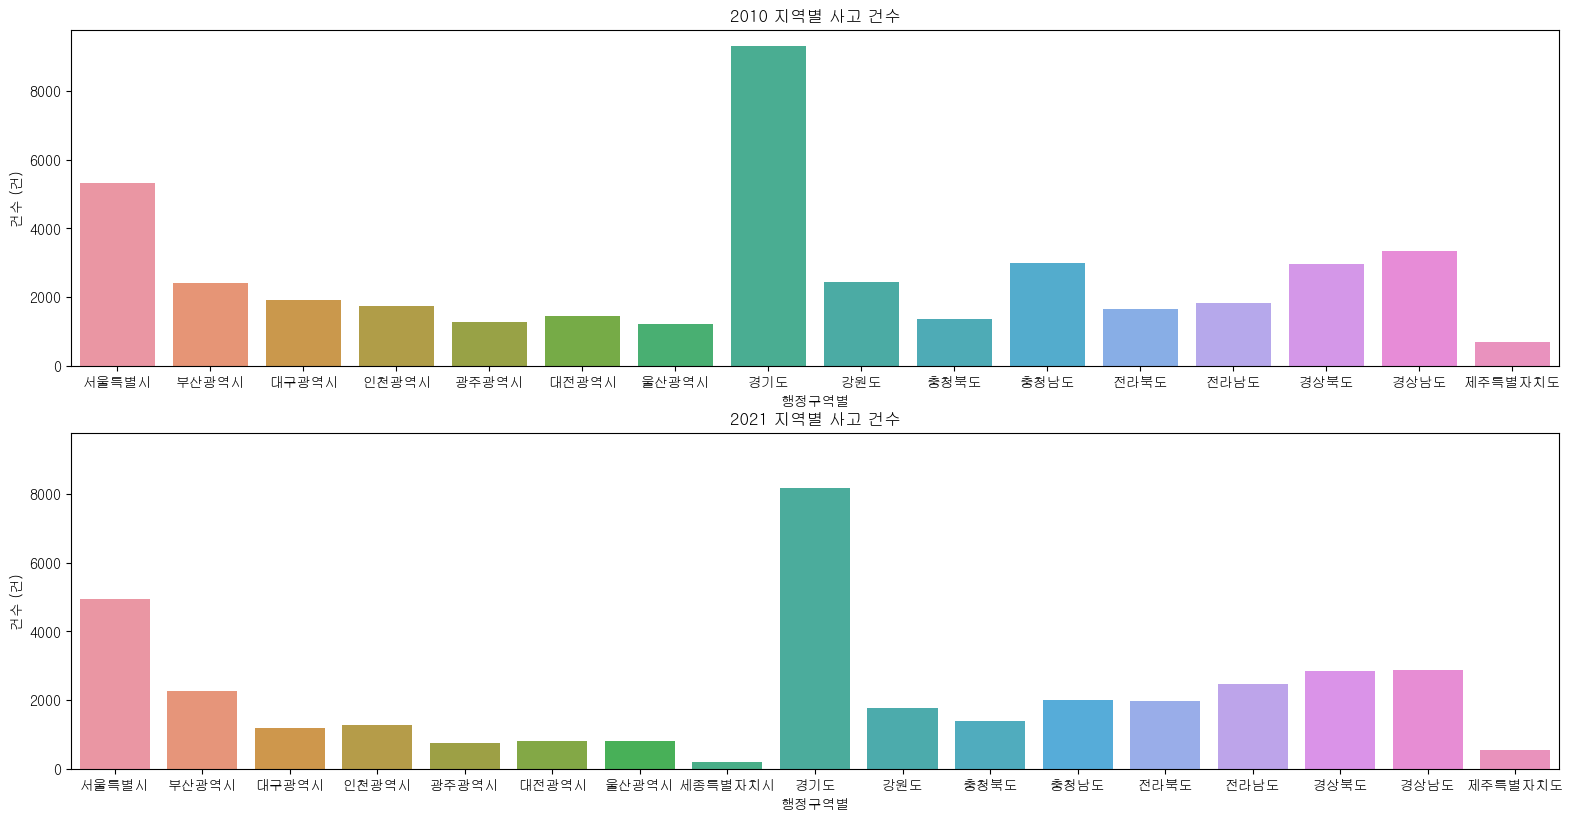

In [13]:
fig = plt.figure(figsize=(6.4*3, 4.8*2))
g = fig.add_subplot(2,1,1)
h = fig.add_subplot(2,1,2, sharey=g)

filter1 = local_data['시점'] == 2010
filter2 = local_data['시점'] == 2021

sns.barplot(data=local_data[filter1], x='행정구역별', y='건수 (건)', ax=g)
g.set_title('2010 지역별 사고 건수')
sns.barplot(data=local_data[filter2], x='행정구역별', y='건수 (건)', ax=h)
h.set_title('2021 지역별 사고 건수')

In [14]:
si_data = local_data[local_data['행정구역별'].str.contains('시')]
print(si_data['행정구역별'].value_counts())
do_data = local_data[local_data['행정구역별'].str.contains('도')]
print(do_data['행정구역별'].value_counts())

서울특별시      12
부산광역시      12
대구광역시      12
인천광역시      12
광주광역시      12
대전광역시      12
울산광역시      12
세종특별자치시    10
Name: 행정구역별, dtype: int64
경기도        12
강원도        12
충청북도       12
충청남도       12
전라북도       12
전라남도       12
경상북도       12
경상남도       12
제주특별자치도    12
Name: 행정구역별, dtype: int64


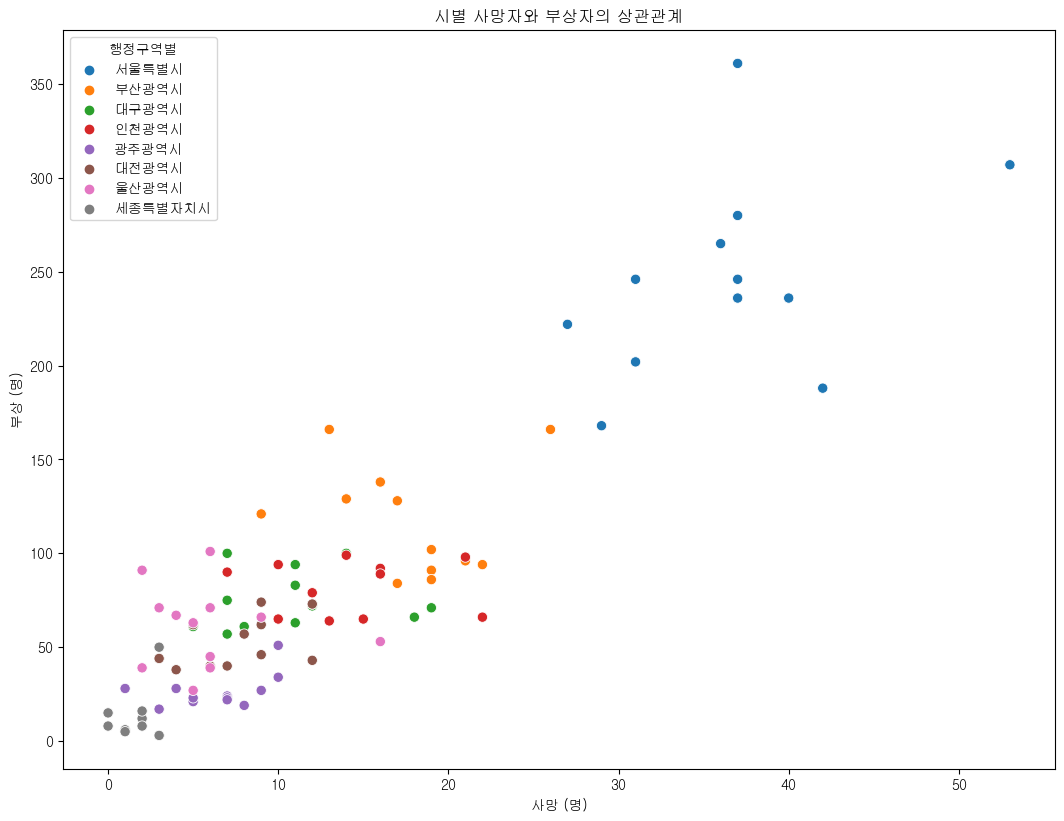

In [80]:
x = sns.scatterplot(data=si_data, x='사망 (명)', y='부상 (명)', hue='행정구역별', s= 55)
x.set_title('시별 사망자와 부상자의 상관관계')
x.figure.set_size_inches(6.4*2, 4.8*2)

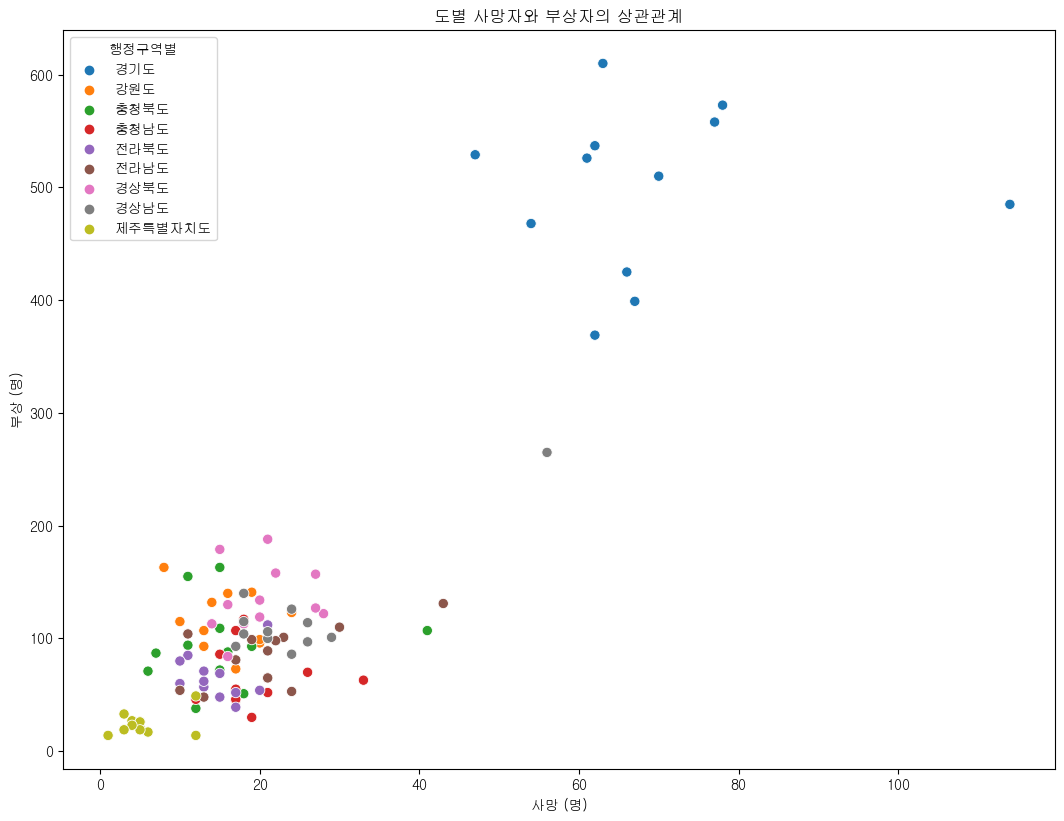

In [76]:
x = sns.scatterplot(data=do_data, x='사망 (명)', y='부상 (명)', hue='행정구역별', s= 55)
x.set_title('도별 사망자와 부상자의 상관관계')
x.figure.set_size_inches(6.4*2, 4.8*2)

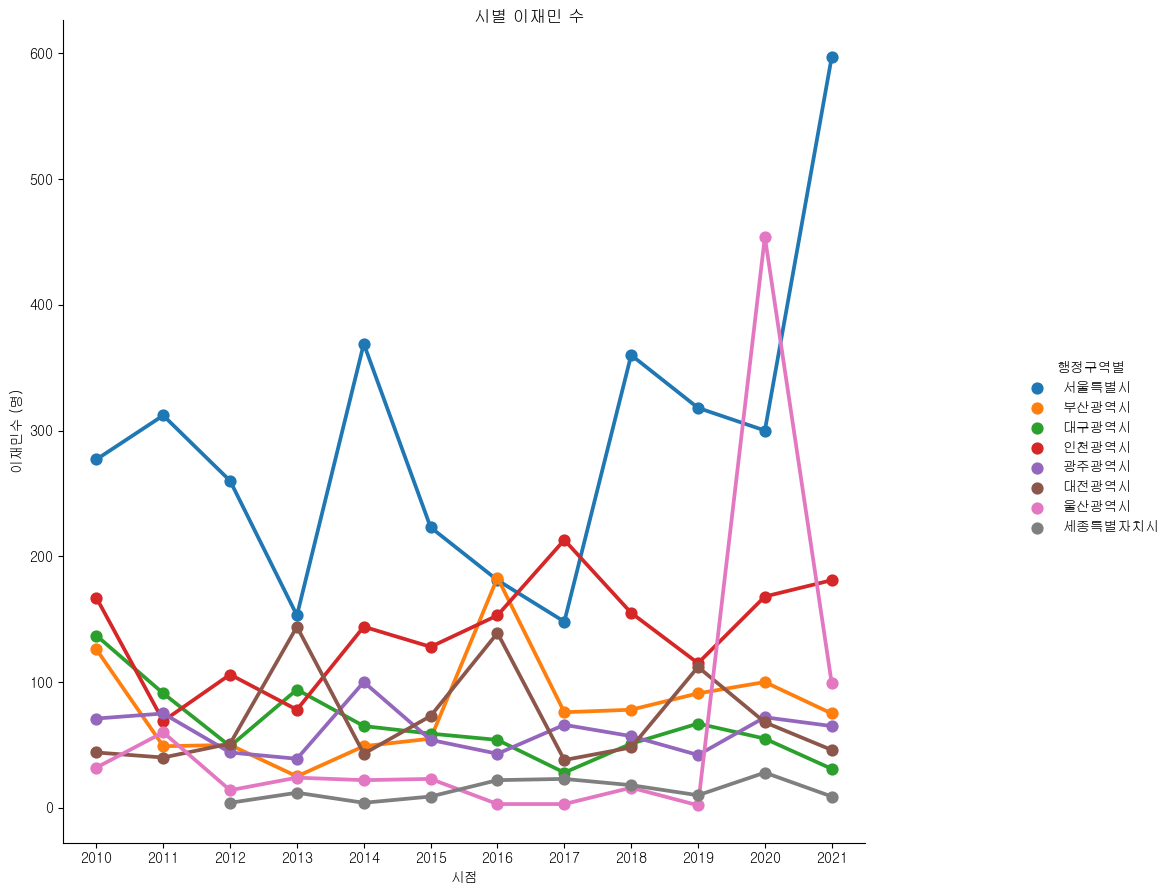

In [44]:
x = sns.catplot(data=si_data, x='시점', y='이재민수 (명)', hue = '행정구역별', kind='point', dodge=False)
x.figure.suptitle('시별 이재민 수')
x.figure.set_size_inches(6.4*2, 4.8*2)

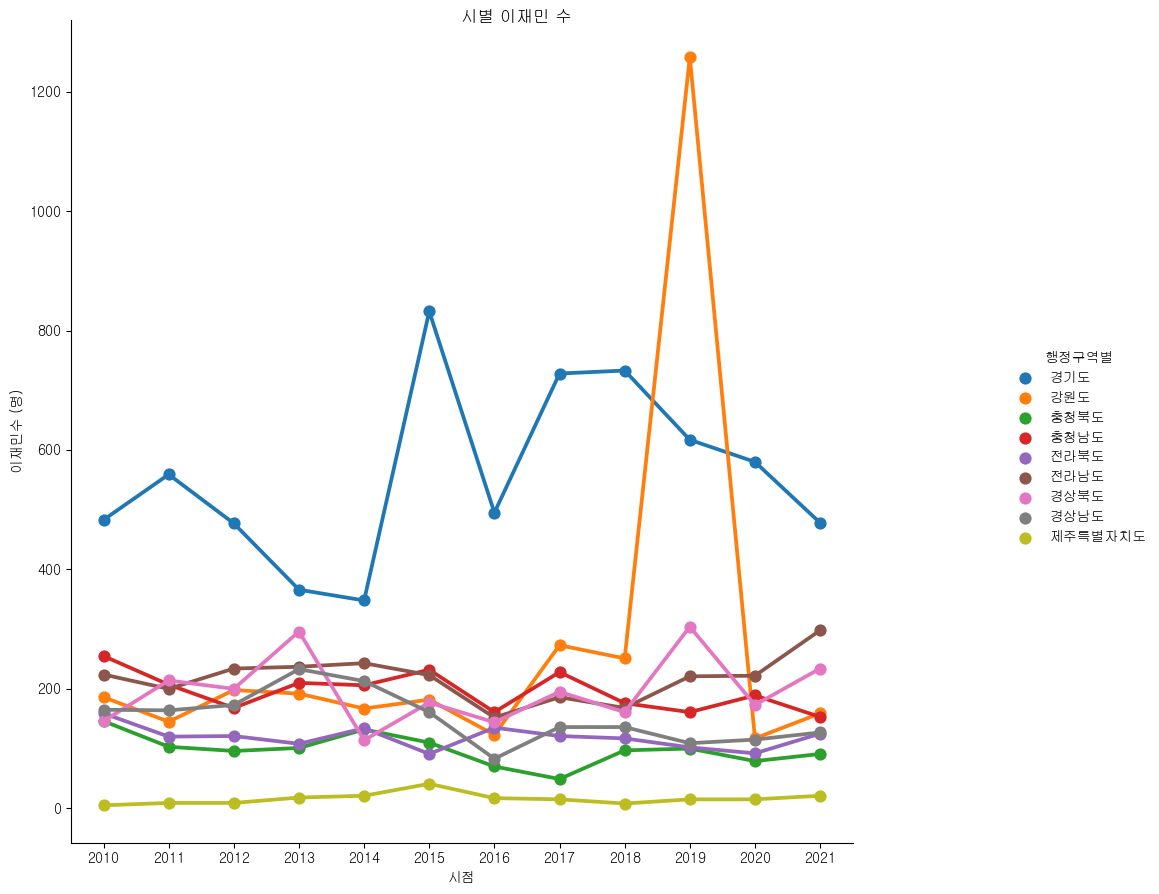

In [46]:
x = sns.catplot(data=do_data, x='시점', y='이재민수 (명)', hue = '행정구역별', kind='point', dodge=False)
x.figure.suptitle('시별 이재민 수')
x.figure.set_size_inches(6.4*2, 4.8*2)